[########################################] | 100% Completed | 642.73 ms


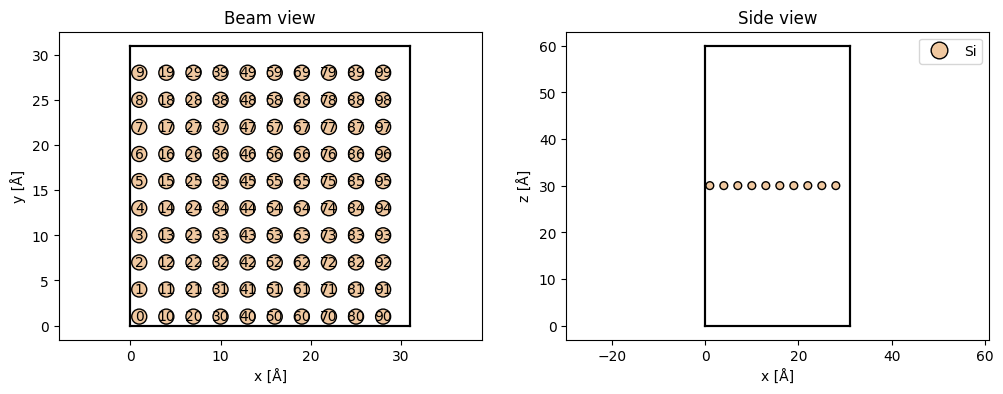

In [1]:
import ase
import abtem
import matplotlib.pyplot as plt
from abtem.core.energy import energy2sigma, energy2wavelength

num_atoms_x = 10 
num_atoms_y = 10
atom_spacing = 3.0
x_start = 1.0
y_start = 1.0

z_start = 60
z_atoms = 30

# Create an empty Atoms object
atoms = ase.Atoms('Si0', cell=[x_start + num_atoms_x* atom_spacing, y_start + num_atoms_y* atom_spacing, z_start])

# Adding atoms in a row
for i in range(num_atoms_x):
    for j in range(num_atoms_y):
        x_position = x_start + i * atom_spacing
        y_position = y_start + j * atom_spacing
        atoms += ase.Atoms('Si1', positions=[(x_position, y_position, z_atoms)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
abtem.show_atoms(atoms, ax=ax1, title="Beam view", numbering=True, merge=False)
abtem.show_atoms(atoms, ax=ax2, plane="xz", title="Side view", legend=True)

potential = abtem.Potential(atoms, sampling=0.4, projection="infinite", slice_thickness=30)
potential_array = potential.build().project().compute()

[########################################] | 100% Completed | 102.90 ms


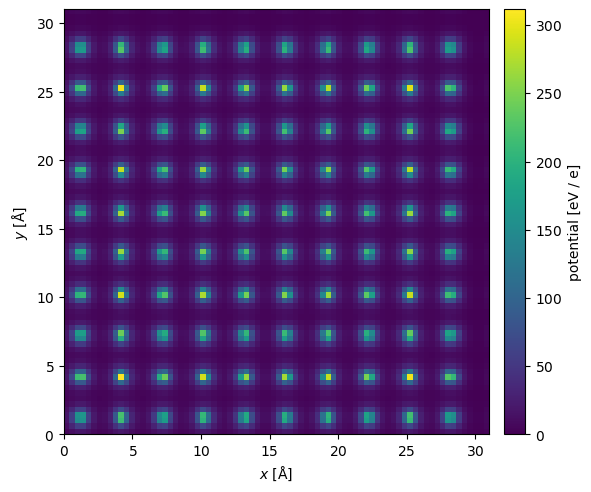

In [2]:
visualization = potential.show(
    project=True,
    explode=True,
    figsize=(16, 5),
    common_color_scale=True,
    cbar=True,
)

In [3]:
PHI_0 = 100e3
sigma = energy2sigma(PHI_0)
wavelength = energy2wavelength(PHI_0)

sample_interaction = (potential_array.array * sigma)
